# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [2]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título

df["title_length"] = df["title"].str.len()

In [3]:
# Calcula media, mediana y moda de la columna 'title_length'
media = np.mean(df["title_length"]).round(2)
mediana = np.median(df["title_length"])
moda = mode(df["title_length"]).mode

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 15.48
Mediana: 14.0
Moda: 12


In [4]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

rango = np.ptp(df["title_length"])
varianza = np.var(df["title_length"])
desviacion = np.std(df["title_length"])

print(f"Rango: {rango}")
print(f"Varianza: {varianza}")
print(f"Desviacion: {desviacion}")

Rango: 67
Varianza: 72.03309541223715
Desviacion: 8.487231316055734


In [5]:
# Calcula asimetría y curtosis de la columna 'title_length'

asimetria = skew(df["title_length"])
curtosis = kurtosis(df["title_length"])

print(f"Asimetria: {asimetria}")
print(f"Curtosis: {curtosis}")

Asimetria: 1.5229143965677572
Curtosis: 3.7867237597626007


Los valores tienen una asimetria positiva (>1)
La curtosis es leptocurtica (>3)

In [6]:
# Imprime el título más corto y el título más largo según su longitud
titulo_menor = df.loc[df['title_length'].idxmin(), 'title']
titulo_mayor = df.loc[df['title_length'].idxmax(), 'title']

print(f"título más corto: {titulo_menor}")
print(f"título más largo: {titulo_mayor}")

título más corto: M
título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


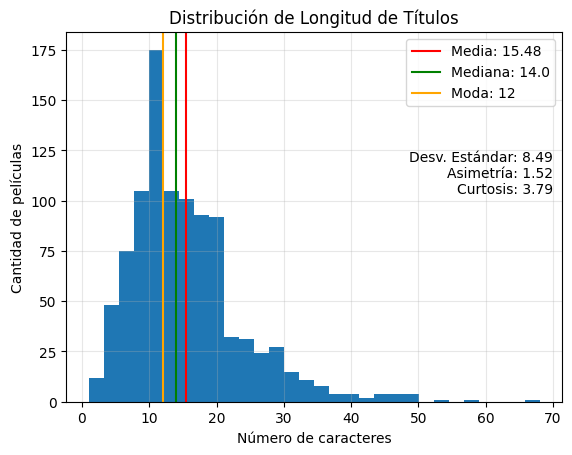

In [7]:
# grafica tus resultados

#plt.figure(figsize=(10, 6))
plt.hist(df['title_length'], bins=30)
plt.axvline(media, color='red', label=f'Media: {media}')
plt.axvline(mediana, color='green', label=f'Mediana: {mediana}')
plt.axvline(moda, color='orange', label=f'Moda: {moda}')
plt.title('Distribución de Longitud de Títulos')
plt.xlabel('Número de caracteres')
plt.ylabel('Cantidad de películas')
plt.legend()
plt.grid(True, alpha=0.3)

# Agregar cuadro con estadísticas adicionales
info_texto = f'Desv. Estándar: {desviacion:.2f}\nAsimetría: {asimetria:.2f}\nCurtosis: {curtosis:.2f}'
plt.text(70, 125, info_texto, 
         fontsize=10, verticalalignment='top', horizontalalignment='right')

plt.show()


---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [8]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

lista = df["title_length"].head(5).to_list()
lista

[24, 13, 22, 15, 12]

In [ ]:
# Calcula la media de los 5 valores

media = sum(lista)/len(lista)
media

17.2

In [44]:
# Calcula las diferencias al cuadrado con respecto a la media

for i in range(len(lista)):
    diferencias = [(x - media)**2 for x in lista]


In [46]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

varianza = sum(diferencias)/(len(lista)-1)
print(f"Varianza: {varianza}")

desviacion_std = (varianza)**(1/2)
print(f"Desviacion estandar: {desviacion_std}")




Varianza: 29.700000000000003
Desviacion estandar: 5.449770637375485
